In [4]:
using SLMTools

Precompiling SLMTools
  ✓ Contour
  ✓ Compat
  ✓ Extents
  ✓ ConcurrentUtilities
  ✓ Formatting
  ✓ ProgressMeter
  ✓ FillArrays
  ✓ TranscodingStreams
  ✓ Inflate
  ✓ OffsetArrays
  ✓ Adapt
  ✓ ConstructionBase
  ✓ BitFlags
  ✓ StaticArraysCore
  ✓ Missings
  ✓ LogExpFunctions
  ✓ OpenSSL_jll
  ✓ Graphite2_jll
  ✓ CPUSummary
  ✓ Libmount_jll
  ✓ RecipesBase
  ✓ EpollShim_jll
  ✓ LLVMOpenMP_jll
  ✓ Bzip2_jll
  ✓ Rmath_jll
  ✓ Xorg_libXau_jll
  ✓ libpng_jll
  ✓ Ghostscript_jll
  ✓ libfdk_aac_jll
  ✓ FileIO
  ✓ Imath_jll
  ✓ IntelOpenMP_jll
  ✓ LAME_jll
  ✓ LERC_jll
  ✓ fzf_jll
  ✓ EarCut_jll
  ✓ JpegTurbo_jll
  ✓ Ogg_jll
  ✓ Xorg_libXdmcp_jll
  ✓ x264_jll
  ✓ x265_jll
  ✓ libaom_jll
  ✓ Zstd_jll
  ✓ LZO_jll
  ✓ Expat_jll
  ✓ Xorg_xtrans_jll
  ✓ Opus_jll
  ✓ Libiconv_jll
  ✓ MutableArithmetics
  ✓ Libffi_jll
  ✓ Wayland_protocols_jll
  ✓ Libgpg_error_jll
  ✓ FFTW_jll
  ✓ OpenSpecFun_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ FriBidi_jll
  ✓ Libuuid_jll
  ✓ Compat → CompatLinearAlgebraExt
  ✓ 

In [5]:
using SLMTools, Images, Statistics,Plots
N = 1024
NSLM = 1024
gauss = makeGaussian((N, N), 5)
mu0=gauss .^ 2
mu = downsample(gauss .^ 2, 8) # Make a 8x downsampled image
mu ./= sum(mu) # Normalize by total intensity
p1=plotBeamMap(mu)

Precompiling GeometryBasicsExt
  ✓ Plots → UnitfulExt
  ✓ Plots → GeometryBasicsExt
  2 dependencies successfully precompiled in 8 seconds. 169 already precompiled.
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


LoadError: UndefVarError: `makeGaussian` not defined

In [6]:
tw = 500 # size of target feature
NT = 1024
word = "S"
txt = hcat([makeLetter(i, (tw, tw))[:, (i == 'I' ? (floor(Int, 0.35 * tw):floor(Int, 0.65 * tw)) : (floor(Int, 0.2 * tw):floor(Int, 0.85 * tw)))] for i in word]...)
arr = zeros(typeof(txt[1]), NT, NT)
arr[CartesianIndices(size(txt)).+CartesianIndex((size(arr) .- size(txt)) .÷ 2).+0*CartesianIndex(N ÷ 4, 0)] .= txt
arr = imfilter(arr, Kernel.gaussian(10))

LoadError: UndefVarError: `makeLetter` not defined

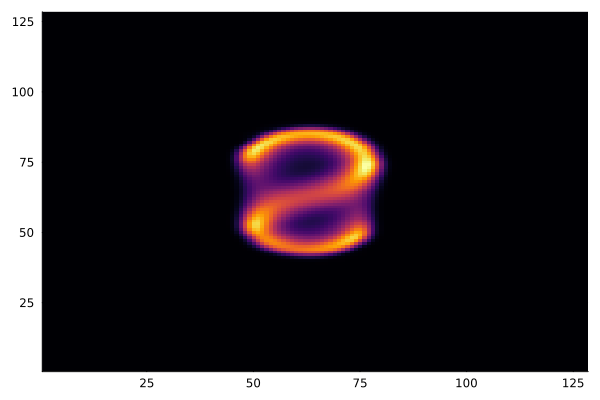

In [23]:
v = downsample(arr, 8; reducer=mean) |> itfa
v ./= sum(v)
L = natlat((128, 128))
phi1 = OTphase(mu, L, v, L, 0.001)
mu_new = sft(sqrt.(mu) .* exp.(2pi * im * phi1)) .^ 2 |> nabs
p2 = hm(mu_new)


In [24]:
slm_bitmap=Int.(floor.(ramp.((phi1.*256) .% 256)))
println(slm_bitmap |> maximum)
slm_bitmap |> minimum

255


0

In [25]:
minimum(phi1)

-0.019099886402194954